# Logistic Regression
*From scratch using python*

**Training set**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl

df=pd.read_csv(r"C:\Users\aditi\OneDrive\Desktop\mnist_train_small.csv", header=None)
m=df.shape[0]
n=df.shape[1]
alpha = 0.000009
iteration = 3500


In [3]:
X0=np.ones([m,1]) #Data preprocessing
X1=(df.iloc[:, 1:n]).to_numpy()
X2 = np.hstack((X0,X1)) #(m,n)
X = X2.T #(n,m)
theta=np.zeros([10,n]) #(10,n)
Y1 = (df.iloc[:,0:1]).to_numpy() #(m, 1)


In [4]:
def log_reg(t): #Function for logistic regression for binary classification
    global theta, Y, H
    theta = np.zeros([1,n]) #(1,n)
    Y = np.zeros([m,1]) #(m,1)
    J_vals=[]

    for i in range(m):
        if (Y1[i][0]==t):
            Y[i][0]=1


    for i in range(iteration):
        Z=np.dot(theta,X) #(1,n)*(n,m)=(1,m)
        H=1/(1+np.exp(-(Z))) #(1,m)
        J=(-1/m)*((np.dot(np.log(H),Y))+np.dot(np.log(1-H),(1-Y)))
        dJ=(1/m)*np.dot((H - (Y.T)),X2) #(1,m)*(m,1)=(1,n)
        theta = theta-alpha*dJ #(1,n)
        J_vals.append(float(J))
        
    pl.plot(np.arange(iteration),J_vals)
    pl.xlabel("No. of Iterations")
    pl.ylabel("Value of cost function")
    pl.show()

In [5]:
def multi_call(): #Function for multi-class logistic regression using one vs. rest strategy
    global theta_multi
    H_multi=np.zeros([10,m])
    Y_multi=np.zeros([m,10])
    theta_multi=np.zeros([10,n])
    for i in range (10):
        log_reg(i)
        H_multi[i,:] = H
        Y_multi[:,i] = Y.T
        theta_multi[i,:] = theta
        print("Logistic regression for class ",i," done.")
        
    accuracy = 0 
    for col in range(10): #Calculating accuracy of model
        for row in range(m):
            if Y_multi[row,col] == 1 and H_multi[col, row] >= 0.5:
                accuracy += 1
            elif Y_multi[row,col] == 0 and H_multi[col, row] < 0.5:
                accuracy += 1
        
    acc = (accuracy/(m*10))*100
    print("Out of ",m*10," cases, number of cases predicted correctly: ",accuracy)
    print("Accuracy %: ",acc)


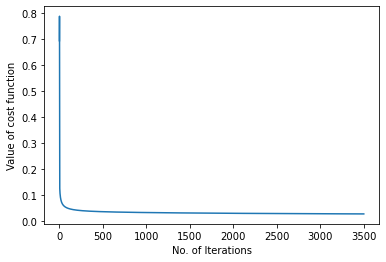

Logistic regression for class  0  done.


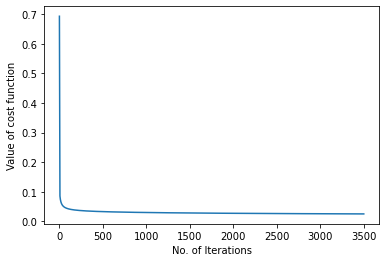

Logistic regression for class  1  done.


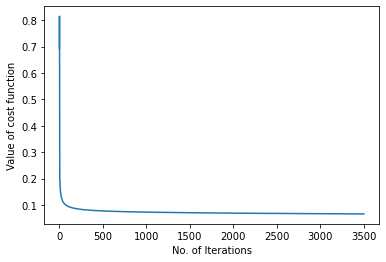

Logistic regression for class  2  done.


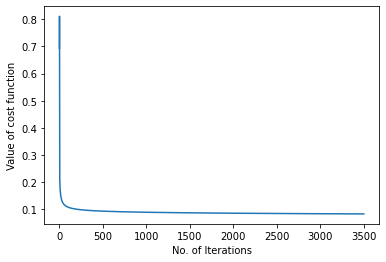

Logistic regression for class  3  done.


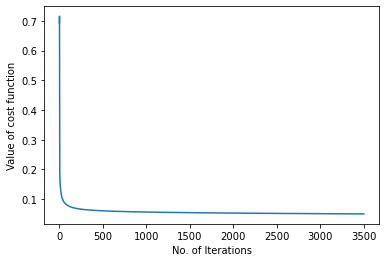

Logistic regression for class  4  done.


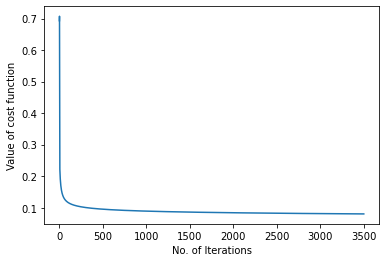

Logistic regression for class  5  done.


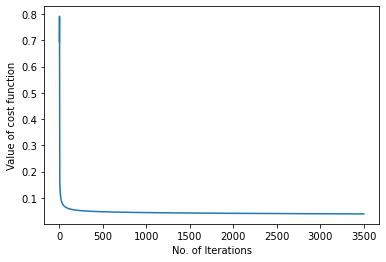

Logistic regression for class  6  done.


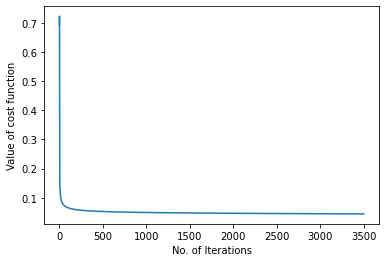

Logistic regression for class  7  done.


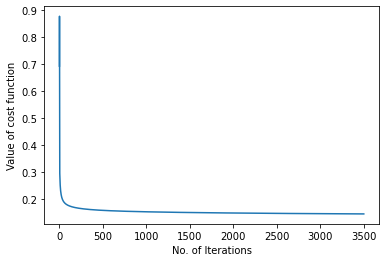

Logistic regression for class  8  done.


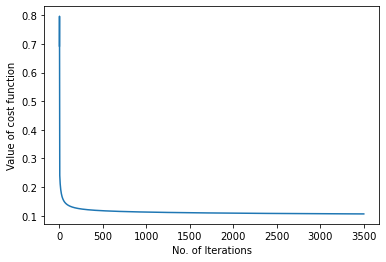

Logistic regression for class  9  done.
Out of  200000  cases, number of cases predicted correctly:  195916
Accuracy %:  97.958


In [6]:
multi_call() #Function call

**Test set**

In [7]:
df=pd.read_csv(r"C:\Users\aditi\OneDrive\Desktop\mnist_test.csv", header=None)
m=df.shape[0]
n=df.shape[1]
alpha = 0.000009
iteration = 3500

In [8]:
X0=np.ones([m,1]) #Data preprocessing
X1=(df.iloc[:, 1:n]).to_numpy()
X2 = np.hstack((X0,X1)) #(m,n)
X = X2.T #(n,m)
Y1 = (df.iloc[:,0:1]).to_numpy() #(m, 1)
Y_multi_test = np.zeros([m,10]) #(m,1)
for j in range(10):
    for i in range(m):
        if (Y1[i][0]==j):
            Y_multi_test[i][j]=1

In [10]:
H_multi_test=np.zeros([10,m])
for i in range (10): #Predicting Hypothesis using model
        Z=np.dot(theta_multi[i,:],X) #(1,n)*(n,m)=(1,m)
        H=1/(1+np.exp(-(Z))) #(1,m)
        H_multi_test[i,:] = H
        print("Class ",i," done.")

accuracy = 0 
for col in range(10): #Calculating accuracy of model
    for row in range(m):
        if Y_multi_test[row,col] == 1 and H_multi_test[col, row] >= 0.5:
             accuracy += 1
        elif Y_multi_test[row,col] == 0 and H_multi_test[col, row] < 0.5:
             accuracy += 1
                
acc = (accuracy/(m*10))*100
print("Out of ",m*10," cases, number of cases predicted correctly: ",accuracy)
print("Accuracy %: ",acc)

Class  0  done.
Class  1  done.
Class  2  done.
Class  3  done.
Class  4  done.
Class  5  done.
Class  6  done.
Class  7  done.
Class  8  done.
Class  9  done.
Out of  100000  cases, number of cases predicted correctly:  97739
Accuracy %:  97.739
